In [27]:
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier, XGBClassifier

# Importation des images

## Création d'une fonction pour scanner un répertoire

In [2]:
def scan_size(path_im):
    images = {}
    for path in path_im[:5000]:
        # récupération nom de l'image
        im_name = os.path.basename(path)
        
        # récupération des images
        img = cv2.imread(path)
        images[int(im_name[:-4])] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return images

In [3]:
im_path = glob.glob('../../../images_training_rev1_resize_black/*.jpg')

In [4]:
images = scan_size(im_path)

In [5]:
images_id = list(images.keys())

## Récupération des outputs correspondants aux images chargées

In [6]:
Y_trainfull = pd.read_csv('./csv/max_benchmark.csv', index_col=0)

In [7]:
Y_trainfull = Y_trainfull.loc[images_id, :]
Y_trainfull

,shape_Class1.1,shape_Class1.2,shape_Class1.3
GalaxyID,,,
100008,0,1,0
100023,0,1,0
100078,1,0,0
100090,1,0,0
100122,1,0,0
...,...,...,...
182956,0,1,0
182961,0,1,0
182971,0,1,0


## Aperçu des classes de galaxies

In [9]:
Y_trainfull.sum()

shape_Class1.1    2209
shape_Class1.2    2791
shape_Class1.3       0
dtype: int64

# Séparation des données en ensembles d'entraînement et de validation

In [10]:
X_train_id, x_val_id, Y_train, y_val = train_test_split(images_id, Y_trainfull, test_size=0.2, random_state=15)

In [11]:
def images_from_id(images_id, images):
    images_selected = []
    
    for image_id in images_id:
        images_selected += [images[image_id]]
    
    return images_selected

In [12]:
X_train = images_from_id(X_train_id, images)
x_val = images_from_id(x_val_id, images)

In [13]:
X_train = np.array(X_train)
x_val = np.array(x_val)
Y_train = np.array(Y_train)
y_val = np.array(y_val)
X_train.shape

(4000, 66, 66, 3)

In [14]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))
x_val = x_val.reshape((x_val.shape[0], x_val.shape[1]*x_val.shape[2]*x_val.shape[3]))

In [15]:
print(X_train.shape)
print(x_val.shape)
print(Y_train.shape)
print(y_val.shape)

(4000, 13068)
(1000, 13068)
(4000, 3)
(1000, 3)


In [16]:
Y_train = Y_train.argmax(axis=1)
y_val = y_val.argmax(axis=1)

# Création d'un modèle type arbre de décision

In [17]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
y_predict = model.predict(x_val)

[[295 176]
 [116 413]]


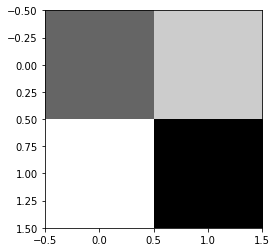

In [19]:
conf_matrix = metrics.confusion_matrix(y_predict, y_val)
print(conf_matrix)
plt.imshow(conf_matrix, cmap='binary');

In [21]:
print(metrics.accuracy_score(y_predict, y_val)*100, "%")

70.8 %


# Création d'un modèle type ensemble

In [23]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
y_predict = model.predict(x_val)

[[323 108]
 [ 88 481]]


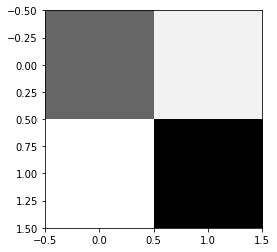

In [25]:
conf_matrix = metrics.confusion_matrix(y_predict, y_val)
print(conf_matrix)
plt.imshow(conf_matrix, cmap='binary');

In [26]:
print(metrics.accuracy_score(y_predict, y_val)*100, "%")

80.4 %


# Création d'un modèle type ensemble

In [ ]:
model = XGBRFClassifier()
model.fit(X_train, Y_train)

In [ ]:
y_predict = model.predict(x_val)

In [ ]:
conf_matrix = metrics.confusion_matrix(y_predict, y_val)
print(conf_matrix)
plt.imshow(conf_matrix, cmap='binary');

In [ ]:
print(metrics.accuracy_score(y_predict, y_val)*100, "%")